In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# macOS용 한글 폰트 설정

# macOS에서 사용 가능한 한글 폰트들
macos_korean_fonts = [
    '/System/Library/Fonts/AppleGothic.ttf',
    '/System/Library/Fonts/AppleSDGothicNeo.ttc',
    '/Library/Fonts/NanumGothic.ttf',
    '/Library/Fonts/NanumBarunGothic.ttf',
    '/System/Library/Fonts/PingFang.ttc'
]

# 사용 가능한 폰트 찾기
available_font = None
for font_path in macos_korean_fonts:
    if os.path.exists(font_path):
        available_font = font_path
        print(f"사용 가능한 폰트 발견: {font_path}")
        break

if available_font:
    # 폰트 설정
    font_prop = fm.FontProperties(fname=available_font)
    plt.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['axes.unicode_minus'] = False
    print(f"폰트 설정 완료: {font_prop.get_name()}")
else:
    # 기본 폰트로 설정
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.rcParams['axes.unicode_minus'] = False
    print("기본 AppleGothic 폰트 사용")

사용 가능한 폰트 발견: /System/Library/Fonts/AppleSDGothicNeo.ttc
폰트 설정 완료: Apple SD Gothic Neo


In [3]:
# 데이터 로드
retail_opncls_df = pd.read_csv('../01_data_analysis/데이터_전처리후/10_주요업종별_가맹점_개폐점률현황/주요도소매별_가맹점_개폐점현황.csv')
service_opncls_df = pd.read_csv('../01_data_analysis/데이터_전처리후/10_주요업종별_가맹점_개폐점률현황/주요서비스별_가맹점_개폐점현황.csv')
food_opncls_df = pd.read_csv('../01_data_analysis/데이터_전처리후/10_주요업종별_가맹점_개폐점률현황/주요외식별_가맹점_개폐점현황.csv')

print("=== 데이터 로드 완료 ===")
print(f"도소매 개폐점 데이터: {retail_opncls_df.shape}")
print(f"서비스 개폐점 데이터: {service_opncls_df.shape}")
print(f"외식 개폐점 데이터: {food_opncls_df.shape}")
print()

# 데이터 미리보기
print("=== 도소매 개폐점 데이터 미리보기 ===")
print(retail_opncls_df.head())
print("\n=== 서비스 개폐점 데이터 미리보기 ===")
print(service_opncls_df.head())
print("\n=== 외식 개폐점 데이터 미리보기 ===")
print(food_opncls_df.head())
print()

=== 데이터 로드 완료 ===
도소매 개폐점 데이터: (40, 12)
서비스 개폐점 데이터: (40, 12)
외식 개폐점 데이터: (40, 12)

=== 도소매 개폐점 데이터 미리보기 ===
     yr indutyLclasNm indutyMlsfcNm  allFrcsCnt  newFrcsRgsCnt  newFrcsRt  \
0  2017           도소매           편의점       35222           6324      17.95   
1  2017           도소매         기타도소매        5737           1160      20.22   
2  2017           도소매           화장품        4101            372       9.07   
3  2017           도소매        (건강)식품        2054            191       9.30   
4  2017           도소매         종합소매점         727            178      24.48   

   bfyrNewFrcsRt  bfyrVersusNewDffrncRt  endCncltnFrcsCnt  endCncltnRt  \
0          18.66                  -0.71              2001         5.68   
1          16.05                   4.17               829        14.45   
2          12.02                  -2.95               235         5.73   
3           9.33                  -0.03               162         7.89   
4          15.10                   9.38                36 

=== 1. 연도별 신규 개점률 추이 분석 ===


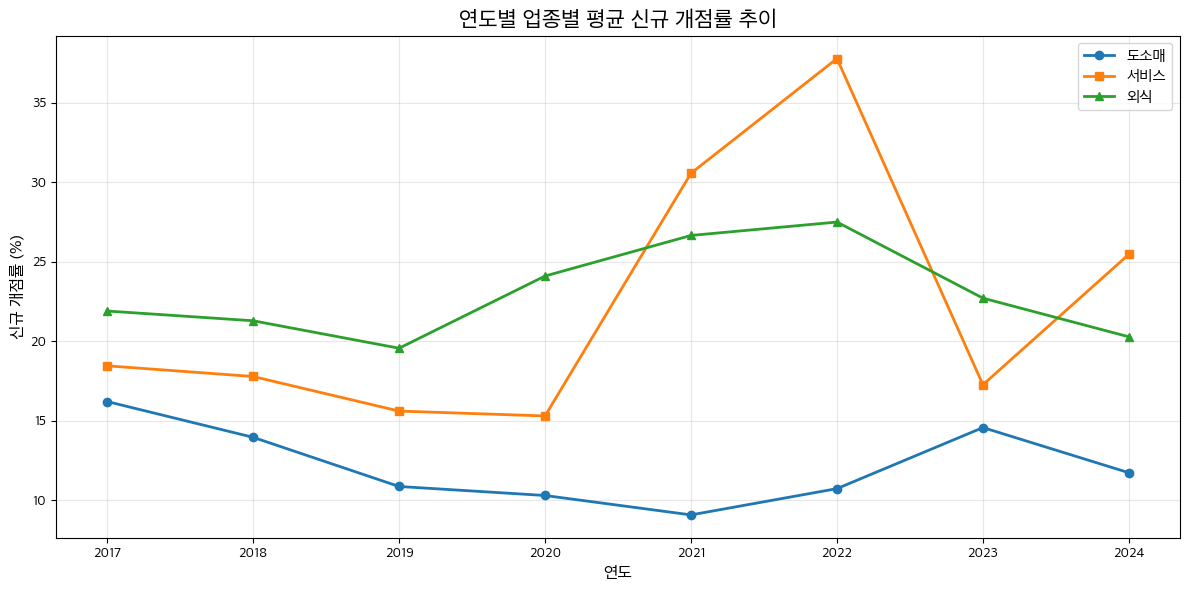

연도별 평균 신규 개점률 (%):
도소매: {2017: 16.204, 2018: 13.952000000000002, 2019: 10.858, 2020: 10.290000000000001, 2021: 9.068, 2022: 10.722, 2023: 14.565999999999999, 2024: 11.722}
서비스: {2017: 18.451999999999998, 2018: 17.78, 2019: 15.604, 2020: 15.296000000000001, 2021: 30.574, 2022: 37.792, 2023: 17.262, 2024: 25.474}
외식: {2017: 21.902, 2018: 21.288, 2019: 19.560000000000002, 2020: 24.104, 2021: 26.657999999999998, 2022: 27.502, 2023: 22.712, 2024: 20.278}



In [4]:
# 1. 연도별 신규 개점률 추이 분석
def analyze_new_store_trends():
    print("=== 1. 연도별 신규 개점률 추이 분석 ===")
    
    # 연도별 평균 신규 개점률 계산
    retail_new = retail_opncls_df.groupby('yr')['newFrcsRt'].mean()
    service_new = service_opncls_df.groupby('yr')['newFrcsRt'].mean()
    food_new = food_opncls_df.groupby('yr')['newFrcsRt'].mean()
    
    # 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(retail_new.index, retail_new.values, marker='o', label='도소매', linewidth=2)
    plt.plot(service_new.index, service_new.values, marker='s', label='서비스', linewidth=2)
    plt.plot(food_new.index, food_new.values, marker='^', label='외식', linewidth=2)
    
    plt.title('연도별 업종별 평균 신규 개점률 추이', fontsize=16, fontweight='bold')
    plt.xlabel('연도', fontsize=12)
    plt.ylabel('신규 개점률 (%)', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 통계 출력
    print("연도별 평균 신규 개점률 (%):")
    print("도소매:", retail_new.to_dict())
    print("서비스:", service_new.to_dict())
    print("외식:", food_new.to_dict())
    print()

analyze_new_store_trends()

=== 2. 연도별 폐점률 추이 분석 ===


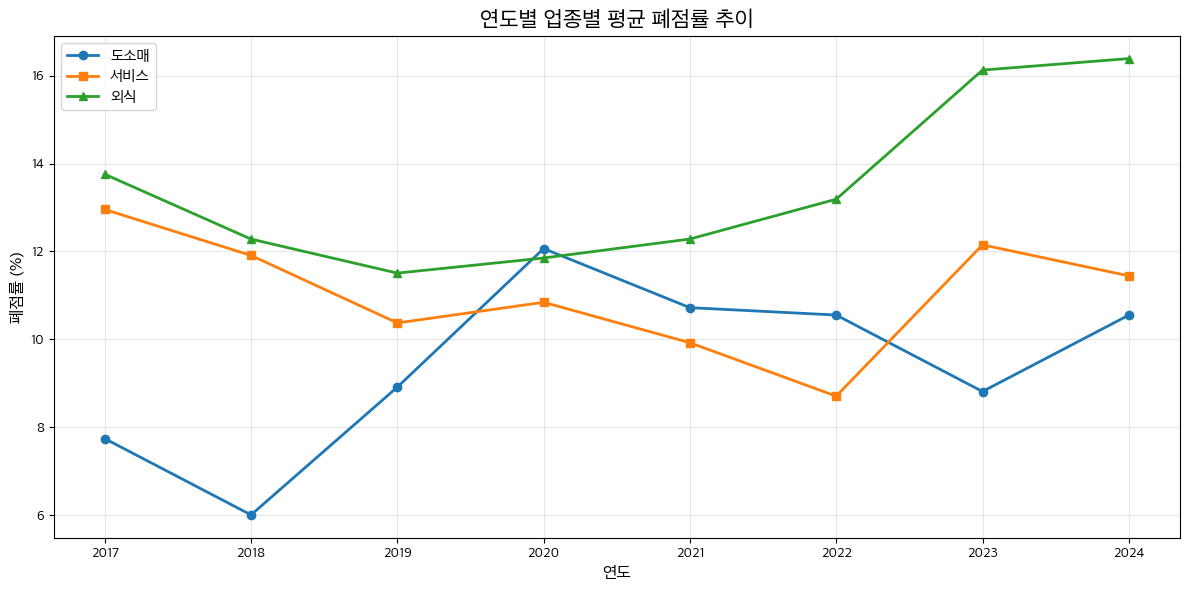

연도별 평균 폐점률 (%):
도소매: {2017: 7.74, 2018: 6.004, 2019: 8.911999999999999, 2020: 12.063999999999998, 2021: 10.72, 2022: 10.552, 2023: 8.812000000000001, 2024: 10.55}
서비스: {2017: 12.954000000000002, 2018: 11.908, 2019: 10.372, 2020: 10.842, 2021: 9.922, 2022: 8.706, 2023: 12.15, 2024: 11.443999999999999}
외식: {2017: 13.756, 2018: 12.28, 2019: 11.506, 2020: 11.85, 2021: 12.282, 2022: 13.187999999999999, 2023: 16.125999999999998, 2024: 16.387999999999998}



In [5]:
# 2. 연도별 폐점률 추이 분석
def analyze_closing_store_trends():
    print("=== 2. 연도별 폐점률 추이 분석 ===")
    
    # 연도별 평균 폐점률 계산
    retail_close = retail_opncls_df.groupby('yr')['endCncltnRt'].mean()
    service_close = service_opncls_df.groupby('yr')['endCncltnRt'].mean()
    food_close = food_opncls_df.groupby('yr')['endCncltnRt'].mean()
    
    # 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(retail_close.index, retail_close.values, marker='o', label='도소매', linewidth=2)
    plt.plot(service_close.index, service_close.values, marker='s', label='서비스', linewidth=2)
    plt.plot(food_close.index, food_close.values, marker='^', label='외식', linewidth=2)
    
    plt.title('연도별 업종별 평균 폐점률 추이', fontsize=16, fontweight='bold')
    plt.xlabel('연도', fontsize=12)
    plt.ylabel('폐점률 (%)', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 통계 출력
    print("연도별 평균 폐점률 (%):")
    print("도소매:", retail_close.to_dict())
    print("서비스:", service_close.to_dict())
    print("외식:", food_close.to_dict())
    print()

analyze_closing_store_trends()

=== 3. 2024년 업종별 개폐점률 분석 ===


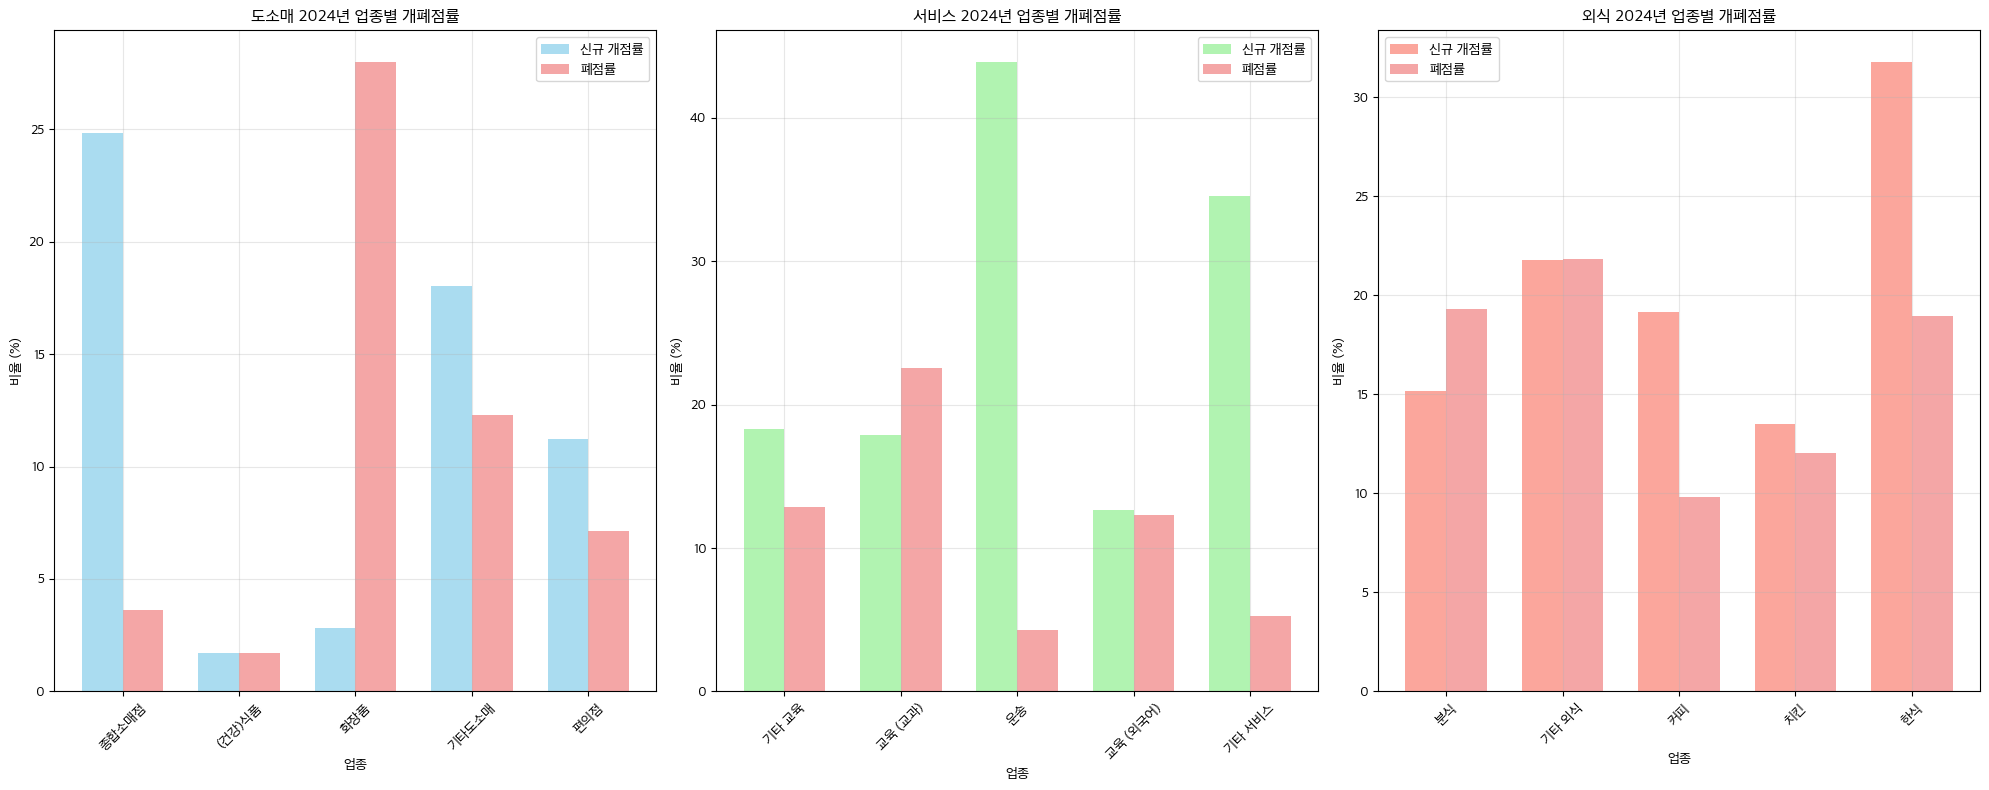

2024년 업종별 개폐점률 (%):
도소매:
  종합소매점: 개점 24.83%, 폐점 3.61%
  (건강)식품: 개점 1.70%, 폐점 1.70%
  화장품: 개점 2.80%, 폐점 28.01%
  기타도소매: 개점 18.05%, 폐점 12.28%
  편의점: 개점 11.23%, 폐점 7.15%

서비스:
  기타 교육: 개점 18.32%, 폐점 12.86%
  교육 (교과): 개점 17.89%, 폐점 22.53%
  운송: 개점 43.92%, 폐점 4.27%
  교육 (외국어): 개점 12.66%, 폐점 12.32%
  기타 서비스: 개점 34.58%, 폐점 5.24%

외식:
  분식: 개점 15.18%, 폐점 19.28%
  기타 외식: 개점 21.80%, 폐점 21.85%
  커피: 개점 19.14%, 폐점 9.81%
  치킨: 개점 13.49%, 폐점 12.04%
  한식: 개점 31.78%, 폐점 18.96%



In [6]:
# 3. 2024년 업종별 개폐점률 분석
def analyze_2024_industry_rates():
    print("=== 3. 2024년 업종별 개폐점률 분석 ===")
    
    # 2024년 데이터만 필터링
    retail_2024 = retail_opncls_df[retail_opncls_df['yr'] == 2024]
    service_2024 = service_opncls_df[service_opncls_df['yr'] == 2024]
    food_2024 = food_opncls_df[food_opncls_df['yr'] == 2024]
    
    # 시각화
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    
    # 도소매
    x = np.arange(len(retail_2024))
    width = 0.35
    axes[0].bar(x - width/2, retail_2024['newFrcsRt'], width, label='신규 개점률', alpha=0.7, color='skyblue')
    axes[0].bar(x + width/2, retail_2024['endCncltnRt'], width, label='폐점률', alpha=0.7, color='lightcoral')
    axes[0].set_title('도소매 2024년 업종별 개폐점률', fontweight='bold')
    axes[0].set_xlabel('업종')
    axes[0].set_ylabel('비율 (%)')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(retail_2024['indutyMlsfcNm'], rotation=45)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # 서비스
    x = np.arange(len(service_2024))
    axes[1].bar(x - width/2, service_2024['newFrcsRt'], width, label='신규 개점률', alpha=0.7, color='lightgreen')
    axes[1].bar(x + width/2, service_2024['endCncltnRt'], width, label='폐점률', alpha=0.7, color='lightcoral')
    axes[1].set_title('서비스 2024년 업종별 개폐점률', fontweight='bold')
    axes[1].set_xlabel('업종')
    axes[1].set_ylabel('비율 (%)')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(service_2024['indutyMlsfcNm'], rotation=45)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # 외식
    x = np.arange(len(food_2024))
    axes[2].bar(x - width/2, food_2024['newFrcsRt'], width, label='신규 개점률', alpha=0.7, color='salmon')
    axes[2].bar(x + width/2, food_2024['endCncltnRt'], width, label='폐점률', alpha=0.7, color='lightcoral')
    axes[2].set_title('외식 2024년 업종별 개폐점률', fontweight='bold')
    axes[2].set_xlabel('업종')
    axes[2].set_ylabel('비율 (%)')
    axes[2].set_xticks(x)
    axes[2].set_xticklabels(food_2024['indutyMlsfcNm'], rotation=45)
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("2024년 업종별 개폐점률 (%):")
    print("도소매:")
    for _, row in retail_2024.iterrows():
        print(f"  {row['indutyMlsfcNm']}: 개점 {row['newFrcsRt']:.2f}%, 폐점 {row['endCncltnRt']:.2f}%")
    print("\n서비스:")
    for _, row in service_2024.iterrows():
        print(f"  {row['indutyMlsfcNm']}: 개점 {row['newFrcsRt']:.2f}%, 폐점 {row['endCncltnRt']:.2f}%")
    print("\n외식:")
    for _, row in food_2024.iterrows():
        print(f"  {row['indutyMlsfcNm']}: 개점 {row['newFrcsRt']:.2f}%, 폐점 {row['endCncltnRt']:.2f}%")
    print()

analyze_2024_industry_rates()

=== 4. 순증가율 분석 (개점률 - 폐점률) ===


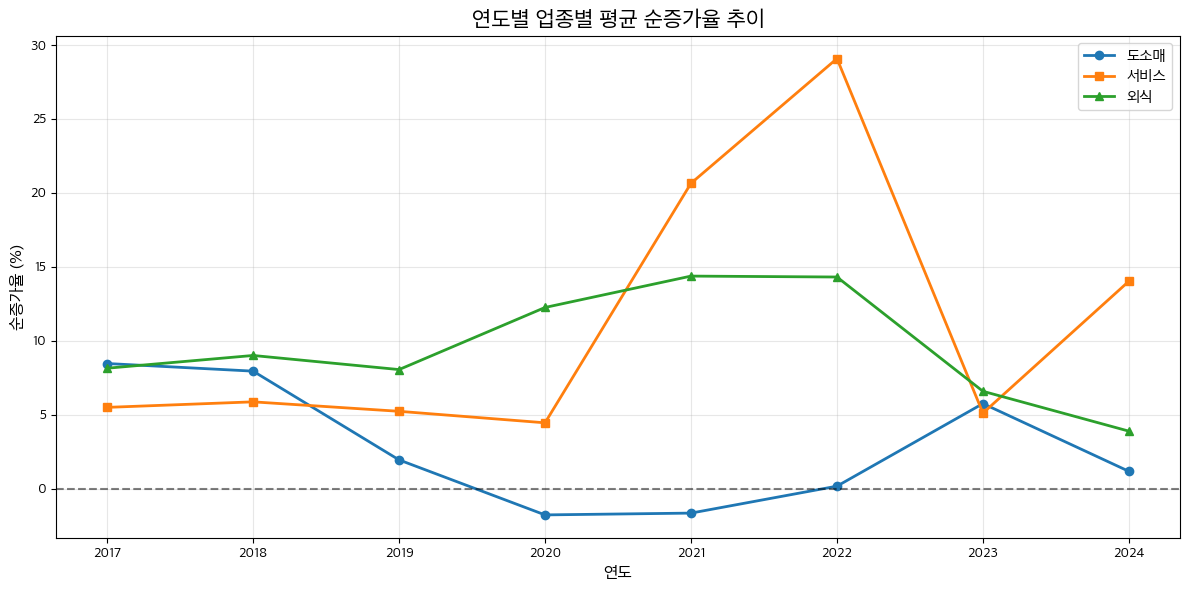

연도별 평균 순증가율 (%):
도소매: {2017: 8.464, 2018: 7.948, 2019: 1.9460000000000002, 2020: -1.773999999999998, 2021: -1.652000000000001, 2022: 0.17000000000000065, 2023: 5.754, 2024: 1.172}
서비스: {2017: 5.497999999999999, 2018: 5.872, 2019: 5.231999999999999, 2020: 4.454, 2021: 20.651999999999997, 2022: 29.086000000000002, 2023: 5.112, 2024: 14.030000000000001}
외식: {2017: 8.146, 2018: 9.008, 2019: 8.054, 2020: 12.254, 2021: 14.376, 2022: 14.314000000000002, 2023: 6.586, 2024: 3.8899999999999997}



In [7]:
# 4. 순증가율 분석 (개점률 - 폐점률)
def analyze_net_growth_rate():
    print("=== 4. 순증가율 분석 (개점률 - 폐점률) ===")
    
    # 순증가율 계산
    retail_opncls_df['netGrowthRt'] = retail_opncls_df['newFrcsRt'] - retail_opncls_df['endCncltnRt']
    service_opncls_df['netGrowthRt'] = service_opncls_df['newFrcsRt'] - service_opncls_df['endCncltnRt']
    food_opncls_df['netGrowthRt'] = food_opncls_df['newFrcsRt'] - food_opncls_df['endCncltnRt']
    
    # 연도별 평균 순증가율
    retail_net = retail_opncls_df.groupby('yr')['netGrowthRt'].mean()
    service_net = service_opncls_df.groupby('yr')['netGrowthRt'].mean()
    food_net = food_opncls_df.groupby('yr')['netGrowthRt'].mean()
    
    # 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(retail_net.index, retail_net.values, marker='o', label='도소매', linewidth=2)
    plt.plot(service_net.index, service_net.values, marker='s', label='서비스', linewidth=2)
    plt.plot(food_net.index, food_net.values, marker='^', label='외식', linewidth=2)
    
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    plt.title('연도별 업종별 평균 순증가율 추이', fontsize=16, fontweight='bold')
    plt.xlabel('연도', fontsize=12)
    plt.ylabel('순증가율 (%)', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("연도별 평균 순증가율 (%):")
    print("도소매:", retail_net.to_dict())
    print("서비스:", service_net.to_dict())
    print("외식:", food_net.to_dict())
    print()

analyze_net_growth_rate()

=== 5. 연도별 업종별 개폐점률 히트맵 ===


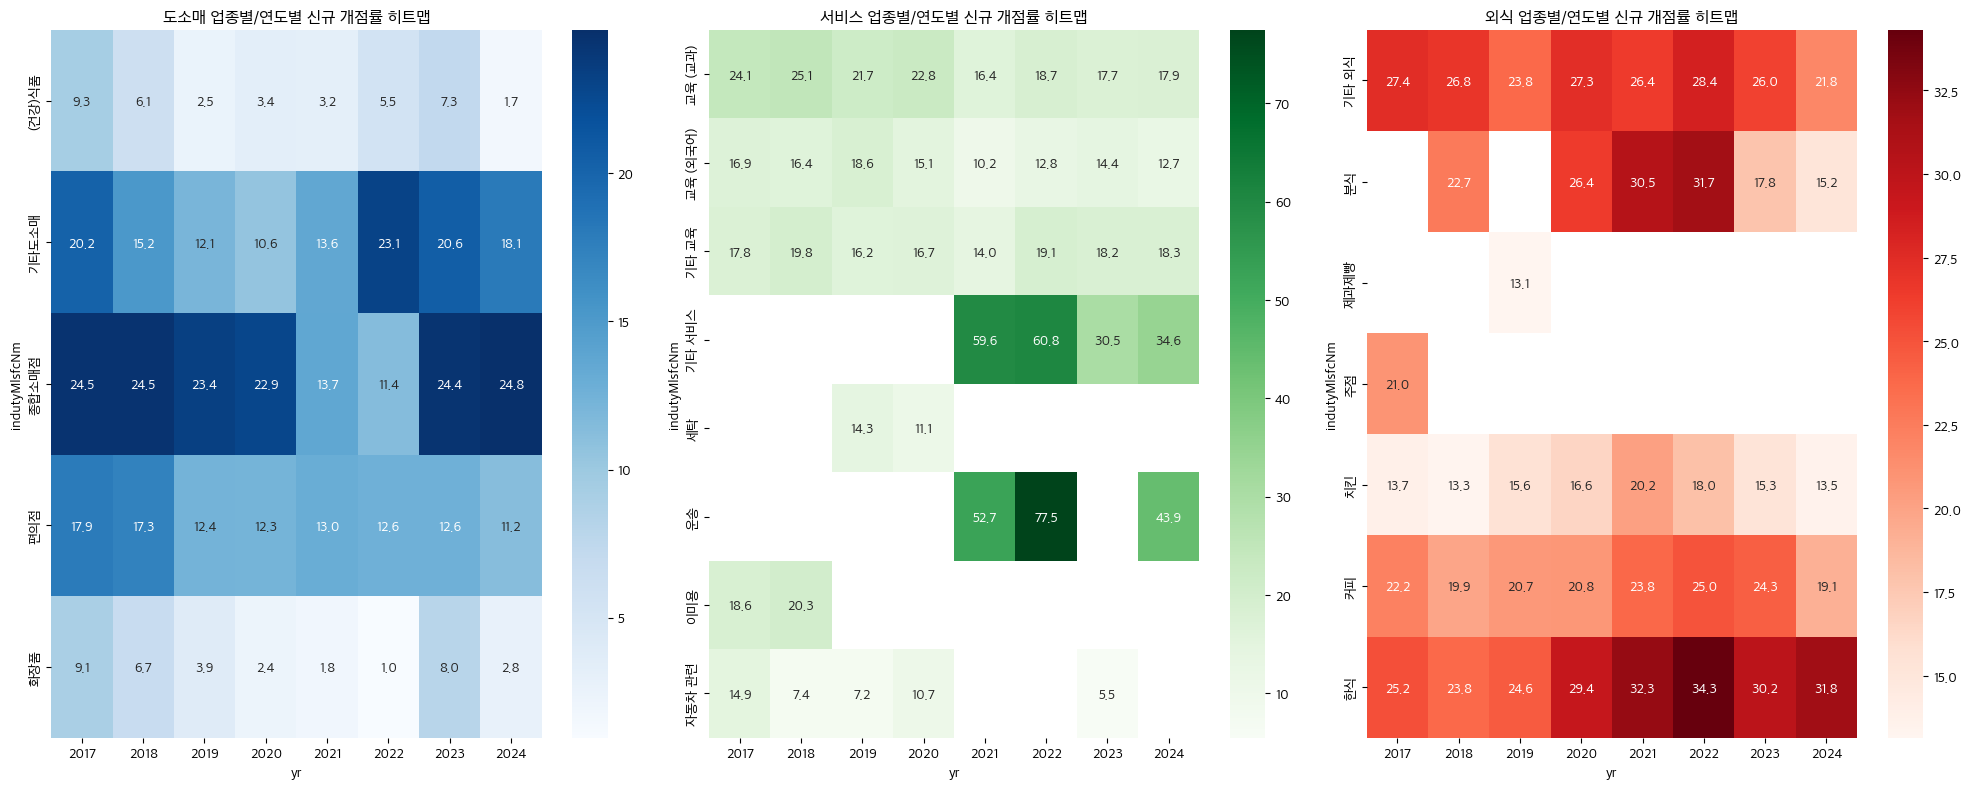

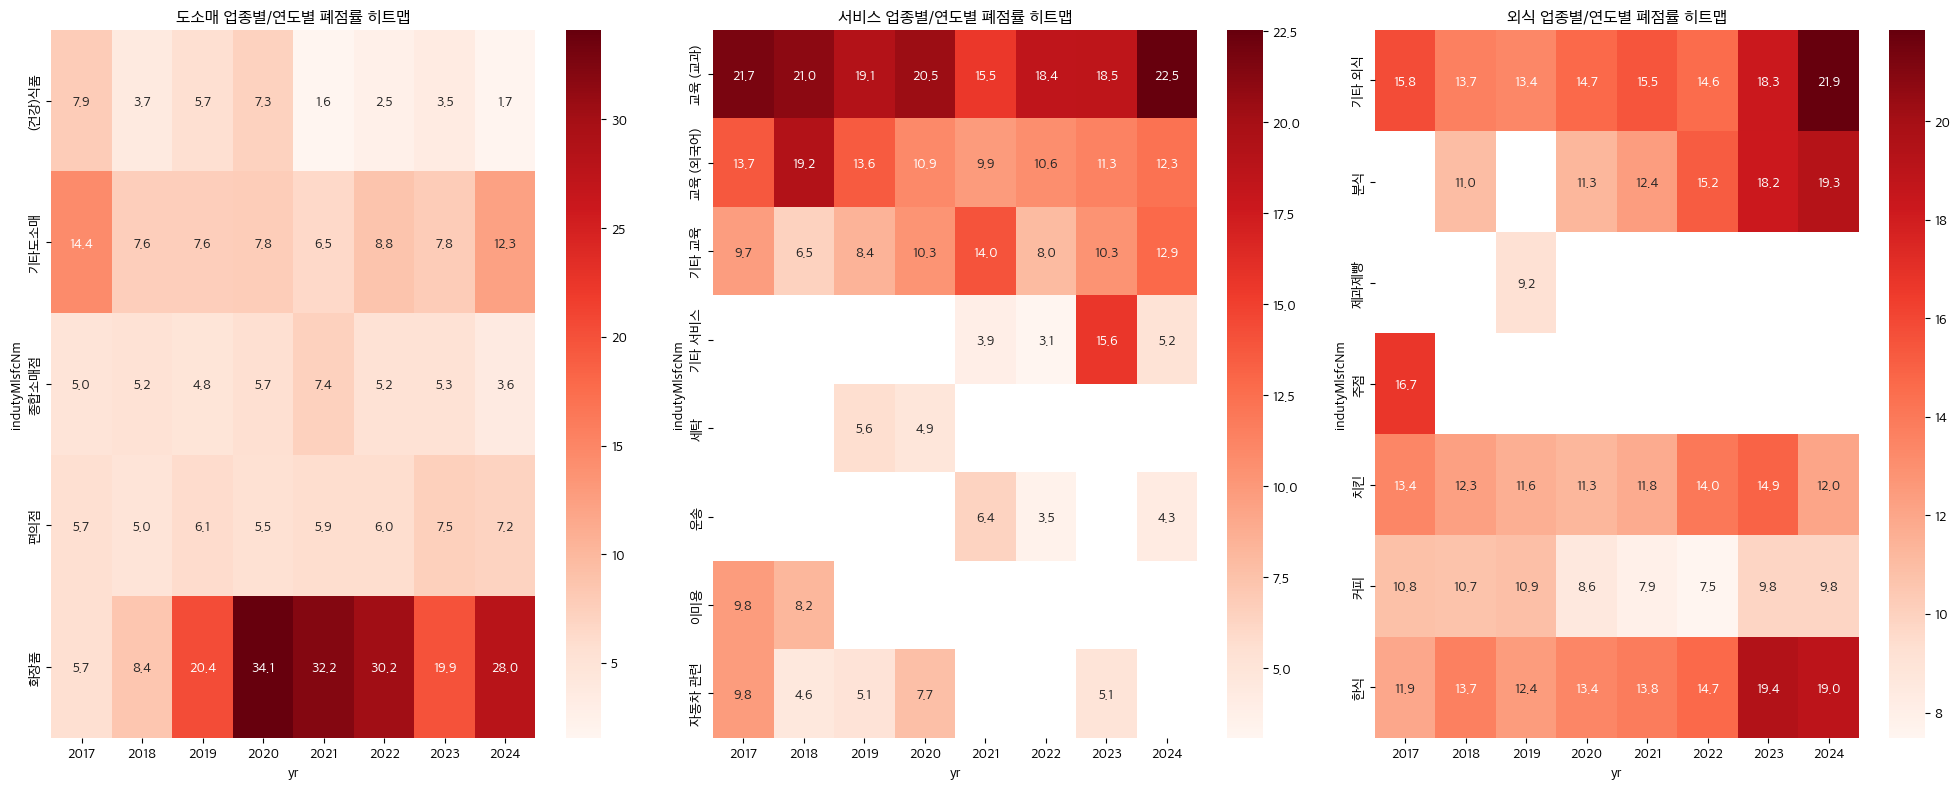

히트맵 데이터 생성 완료



In [8]:
# 5. 연도별 업종별 히트맵
def create_yearly_heatmap():
    print("=== 5. 연도별 업종별 개폐점률 히트맵 ===")
    
    # 신규 개점률 히트맵
    retail_new_pivot = retail_opncls_df.pivot_table(values='newFrcsRt', index='indutyMlsfcNm', columns='yr', aggfunc='mean')
    service_new_pivot = service_opncls_df.pivot_table(values='newFrcsRt', index='indutyMlsfcNm', columns='yr', aggfunc='mean')
    food_new_pivot = food_opncls_df.pivot_table(values='newFrcsRt', index='indutyMlsfcNm', columns='yr', aggfunc='mean')
    
    # 시각화
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    
    sns.heatmap(retail_new_pivot, annot=True, fmt='.1f', cmap='Blues', ax=axes[0])
    axes[0].set_title('도소매 업종별/연도별 신규 개점률 히트맵', fontweight='bold')
    
    sns.heatmap(service_new_pivot, annot=True, fmt='.1f', cmap='Greens', ax=axes[1])
    axes[1].set_title('서비스 업종별/연도별 신규 개점률 히트맵', fontweight='bold')
    
    sns.heatmap(food_new_pivot, annot=True, fmt='.1f', cmap='Reds', ax=axes[2])
    axes[2].set_title('외식 업종별/연도별 신규 개점률 히트맵', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 폐점률 히트맵
    retail_close_pivot = retail_opncls_df.pivot_table(values='endCncltnRt', index='indutyMlsfcNm', columns='yr', aggfunc='mean')
    service_close_pivot = service_opncls_df.pivot_table(values='endCncltnRt', index='indutyMlsfcNm', columns='yr', aggfunc='mean')
    food_close_pivot = food_opncls_df.pivot_table(values='endCncltnRt', index='indutyMlsfcNm', columns='yr', aggfunc='mean')
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    
    sns.heatmap(retail_close_pivot, annot=True, fmt='.1f', cmap='Reds', ax=axes[0])
    axes[0].set_title('도소매 업종별/연도별 폐점률 히트맵', fontweight='bold')
    
    sns.heatmap(service_close_pivot, annot=True, fmt='.1f', cmap='Reds', ax=axes[1])
    axes[1].set_title('서비스 업종별/연도별 폐점률 히트맵', fontweight='bold')
    
    sns.heatmap(food_close_pivot, annot=True, fmt='.1f', cmap='Reds', ax=axes[2])
    axes[2].set_title('외식 업종별/연도별 폐점률 히트맵', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("히트맵 데이터 생성 완료")
    print()

create_yearly_heatmap()

=== 6. 상세 통계 분석 ===
도소매 신규 개점률 통계:
count    40.000000
mean     12.172750
std       7.575813
min       0.960000
25%       5.982500
50%      12.210000
75%      17.975000
max      24.830000
Name: newFrcsRt, dtype: float64

도소매 폐점률 통계:
count    40.000000
mean      9.419250
std       8.327394
min       1.560000
25%       5.250000
50%       6.310000
75%       8.025000
max      34.120000
Name: endCncltnRt, dtype: float64

서비스 신규 개점률 통계:
count    40.000000
mean     22.279250
std      15.597595
min       5.500000
25%      14.377500
50%      17.865000
75%      22.015000
max      77.480000
Name: newFrcsRt, dtype: float64

서비스 폐점률 통계:
count    40.000000
mean     11.037250
std       5.686668
min       3.070000
25%       6.205000
50%      10.080000
75%      14.355000
max      22.530000
Name: endCncltnRt, dtype: float64

외식 신규 개점률 통계:
count    40.00000
mean     23.00050
std       5.84118
min      13.14000
25%      18.86250
50%      23.78000
75%      26.95000
max      34.31000
Name: newFrcsRt, dtype: 

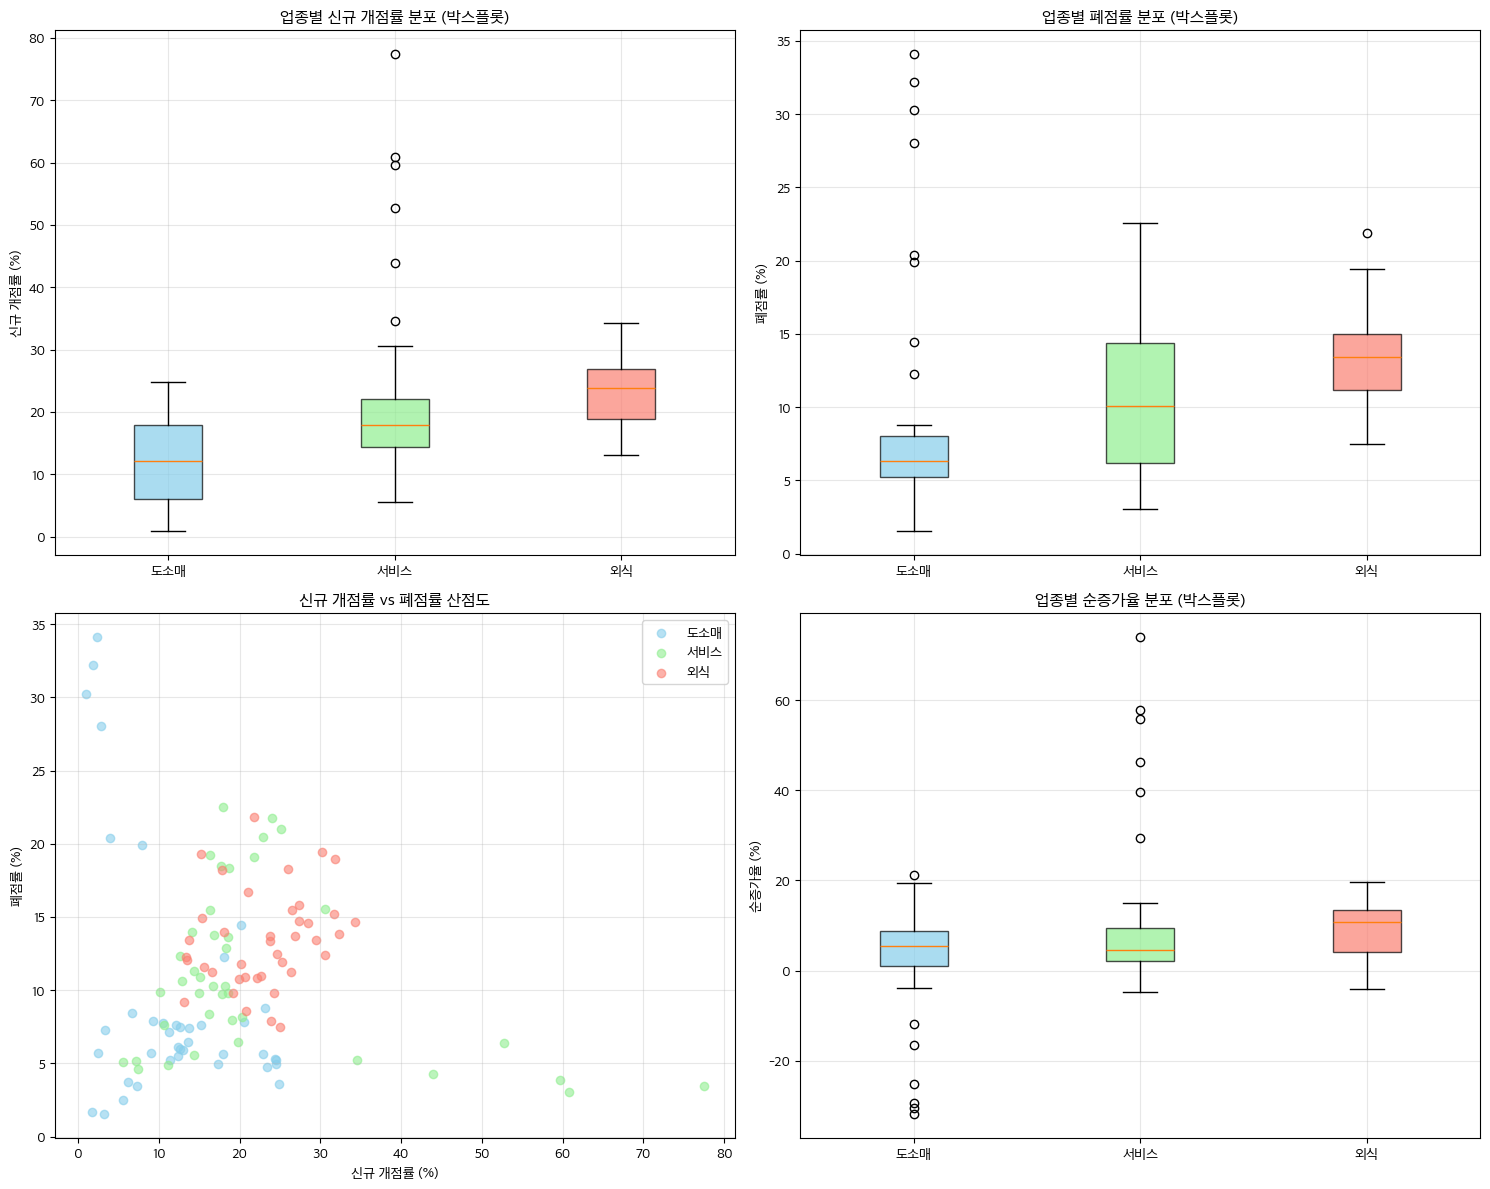

=== 최고/최저 개폐점률 업종 ===
도소매 최고 신규 개점률: 2024년 종합소매점 - 24.83%
도소매 최고 폐점률: 2020년 화장품 - 34.12%

서비스 최고 신규 개점률: 2022년 운송 - 77.48%
서비스 최고 폐점률: 2024년 교육 (교과) - 22.53%

외식 최고 신규 개점률: 2022년 한식 - 34.31%
외식 최고 폐점률: 2024년 기타 외식 - 21.85%



In [9]:
# 6. 상세 통계 분석 (시각화 포함)
def detailed_statistics():
    print("=== 6. 상세 통계 분석 ===")
    
    # 각 업종별 통계
    retail_new_stats = retail_opncls_df['newFrcsRt'].describe()
    retail_close_stats = retail_opncls_df['endCncltnRt'].describe()
    service_new_stats = service_opncls_df['newFrcsRt'].describe()
    service_close_stats = service_opncls_df['endCncltnRt'].describe()
    food_new_stats = food_opncls_df['newFrcsRt'].describe()
    food_close_stats = food_opncls_df['endCncltnRt'].describe()
    
    print("도소매 신규 개점률 통계:")
    print(retail_new_stats)
    print("\n도소매 폐점률 통계:")
    print(retail_close_stats)
    print("\n서비스 신규 개점률 통계:")
    print(service_new_stats)
    print("\n서비스 폐점률 통계:")
    print(service_close_stats)
    print("\n외식 신규 개점률 통계:")
    print(food_new_stats)
    print("\n외식 폐점률 통계:")
    print(food_close_stats)
    print()
    
    # 통계 시각화
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. 신규 개점률 박스플롯
    data_new = [retail_opncls_df['newFrcsRt'], service_opncls_df['newFrcsRt'], food_opncls_df['newFrcsRt']]
    labels = ['도소매', '서비스', '외식']
    colors = ['skyblue', 'lightgreen', 'salmon']
    
    bp_new = axes[0,0].boxplot(data_new, labels=labels, patch_artist=True)
    for patch, color in zip(bp_new['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    axes[0,0].set_title('업종별 신규 개점률 분포 (박스플롯)', fontweight='bold')
    axes[0,0].set_ylabel('신규 개점률 (%)')
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. 폐점률 박스플롯
    data_close = [retail_opncls_df['endCncltnRt'], service_opncls_df['endCncltnRt'], food_opncls_df['endCncltnRt']]
    
    bp_close = axes[0,1].boxplot(data_close, labels=labels, patch_artist=True)
    for patch, color in zip(bp_close['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    axes[0,1].set_title('업종별 폐점률 분포 (박스플롯)', fontweight='bold')
    axes[0,1].set_ylabel('폐점률 (%)')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. 신규 개점률 vs 폐점률 산점도
    axes[1,0].scatter(retail_opncls_df['newFrcsRt'], retail_opncls_df['endCncltnRt'], alpha=0.6, color='skyblue', label='도소매')
    axes[1,0].scatter(service_opncls_df['newFrcsRt'], service_opncls_df['endCncltnRt'], alpha=0.6, color='lightgreen', label='서비스')
    axes[1,0].scatter(food_opncls_df['newFrcsRt'], food_opncls_df['endCncltnRt'], alpha=0.6, color='salmon', label='외식')
    axes[1,0].set_title('신규 개점률 vs 폐점률 산점도', fontweight='bold')
    axes[1,0].set_xlabel('신규 개점률 (%)')
    axes[1,0].set_ylabel('폐점률 (%)')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. 순증가율 분포
    data_net = [retail_opncls_df['netGrowthRt'], service_opncls_df['netGrowthRt'], food_opncls_df['netGrowthRt']]
    
    bp_net = axes[1,1].boxplot(data_net, labels=labels, patch_artist=True)
    for patch, color in zip(bp_net['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    axes[1,1].set_title('업종별 순증가율 분포 (박스플롯)', fontweight='bold')
    axes[1,1].set_ylabel('순증가율 (%)')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 최고/최저 개폐점률 업종
    print("=== 최고/최저 개폐점률 업종 ===")
    for df, name in [(retail_opncls_df, '도소매'), (service_opncls_df, '서비스'), (food_opncls_df, '외식')]:
        max_new_idx = df['newFrcsRt'].idxmax()
        max_close_idx = df['endCncltnRt'].idxmax()
        
        print(f"{name} 최고 신규 개점률: {df.loc[max_new_idx, 'yr']}년 {df.loc[max_new_idx, 'indutyMlsfcNm']} - {df.loc[max_new_idx, 'newFrcsRt']:.2f}%")
        print(f"{name} 최고 폐점률: {df.loc[max_close_idx, 'yr']}년 {df.loc[max_close_idx, 'indutyMlsfcNm']} - {df.loc[max_close_idx, 'endCncltnRt']:.2f}%")
        print()

detailed_statistics()

=== 7. 전년 대비 변화율 분석 ===


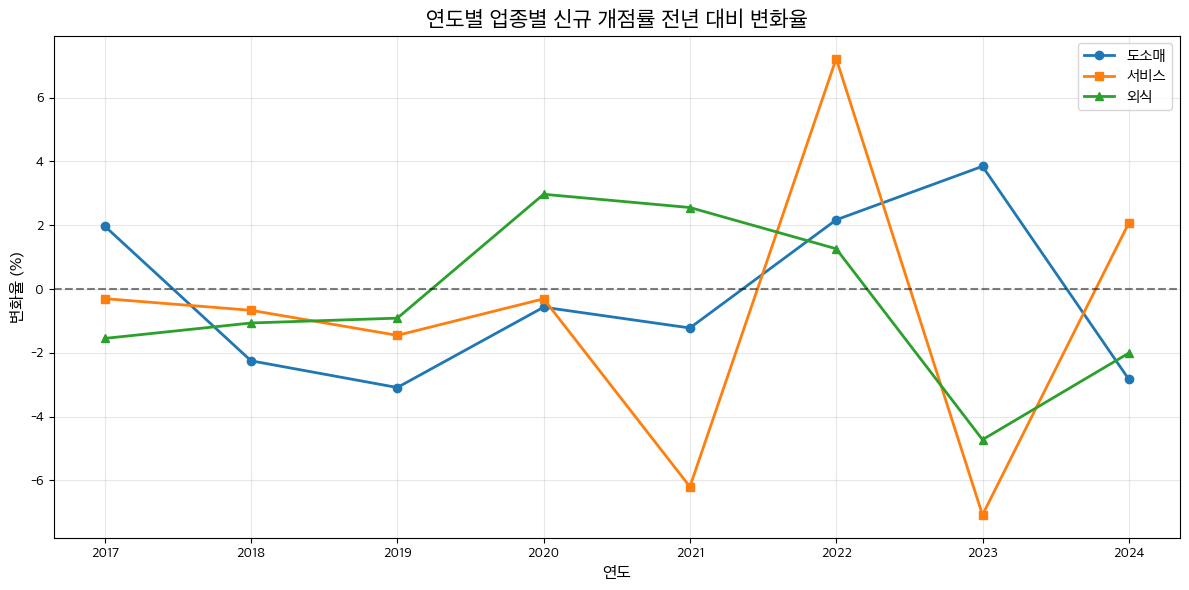

연도별 신규 개점률 전년 대비 변화율 (%):
도소매: {2017: 1.9720000000000002, 2018: -2.2520000000000002, 2019: -3.09, 2020: -0.5700000000000001, 2021: -1.2220000000000002, 2022: 2.1700000000000004, 2023: 3.848, 2024: -2.832}
서비스: {2017: -0.3020000000000001, 2018: -0.6679999999999999, 2019: -1.454, 2020: -0.30799999999999994, 2021: -6.202, 2022: 7.228, 2023: -7.086, 2024: 2.068}
외식: {2017: -1.55, 2018: -1.066, 2019: -0.914, 2020: 2.972, 2021: 2.556, 2022: 1.262, 2023: -4.726, 2024: -2.0100000000000002}



In [10]:
# 7. 전년 대비 변화율 분석
def analyze_year_over_year_changes():
    print("=== 7. 전년 대비 변화율 분석 ===")
    
    # 신규 개점률 변화율
    retail_new_change = retail_opncls_df.groupby('yr')['bfyrVersusNewDffrncRt'].mean()
    service_new_change = service_opncls_df.groupby('yr')['bfyrVersusNewDffrncRt'].mean()
    food_new_change = food_opncls_df.groupby('yr')['bfyrVersusNewDffrncRt'].mean()
    
    # 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(retail_new_change.index, retail_new_change.values, marker='o', label='도소매', linewidth=2)
    plt.plot(service_new_change.index, service_new_change.values, marker='s', label='서비스', linewidth=2)
    plt.plot(food_new_change.index, food_new_change.values, marker='^', label='외식', linewidth=2)
    
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    plt.title('연도별 업종별 신규 개점률 전년 대비 변화율', fontsize=16, fontweight='bold')
    plt.xlabel('연도', fontsize=12)
    plt.ylabel('변화율 (%)', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("연도별 신규 개점률 전년 대비 변화율 (%):")
    print("도소매:", retail_new_change.to_dict())
    print("서비스:", service_new_change.to_dict())
    print("외식:", food_new_change.to_dict())
    print()

analyze_year_over_year_changes()

=== 8. 업종별 안정성 분석 ===


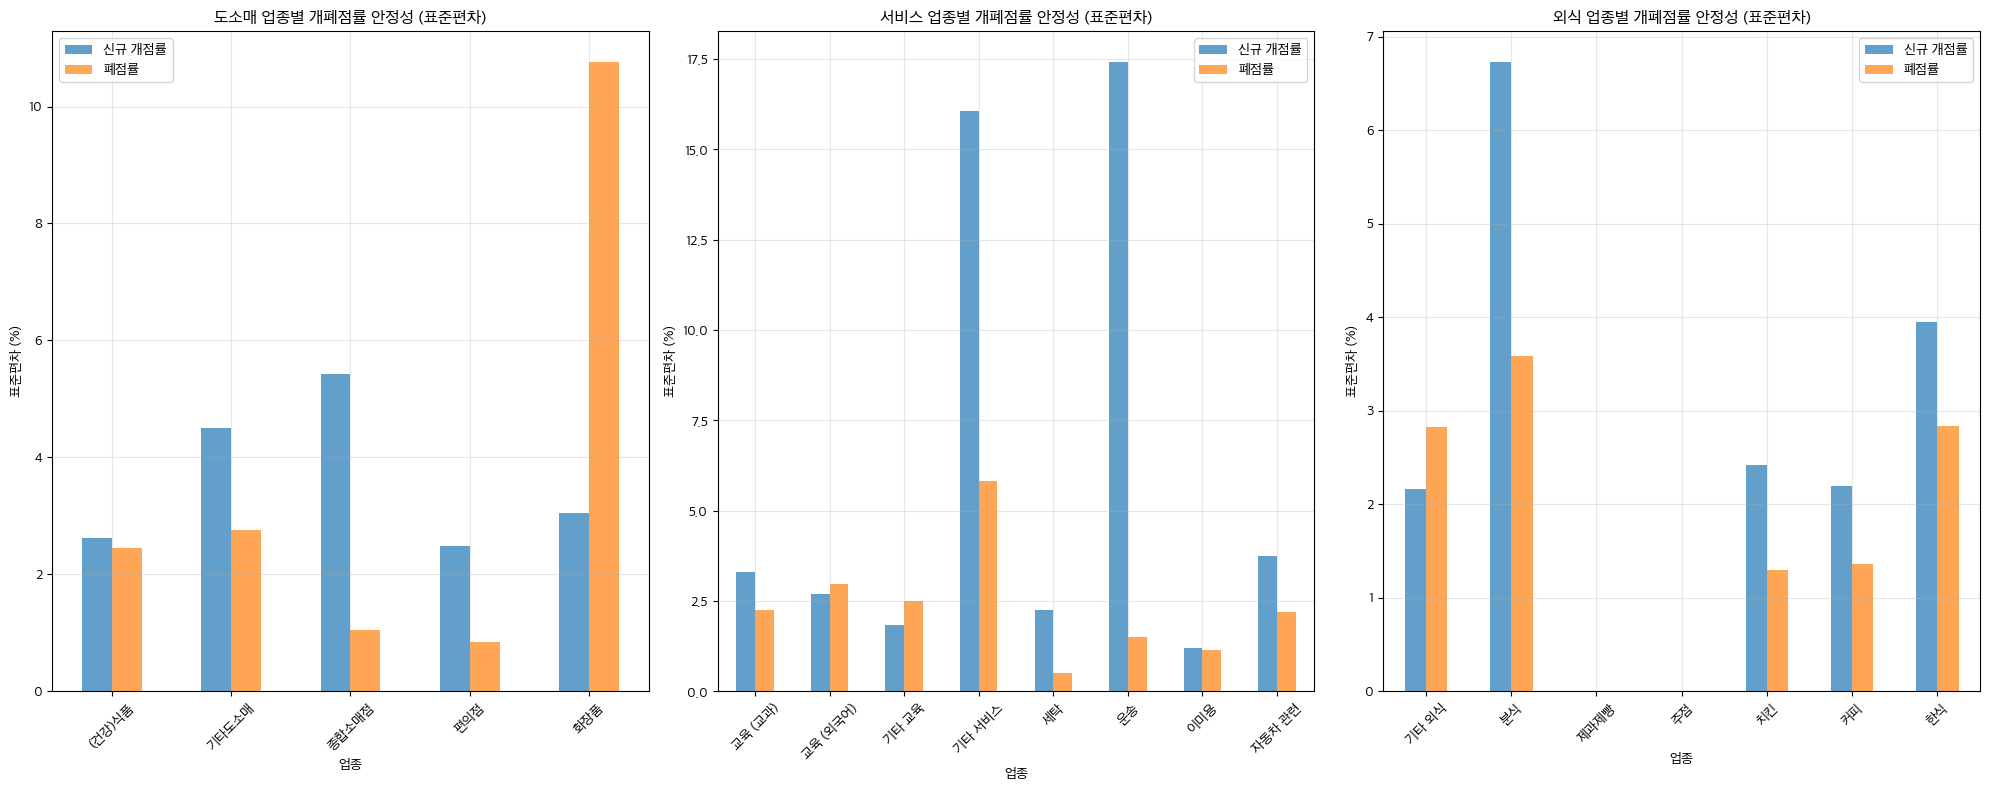

업종별 개폐점률 안정성 (표준편차):
도소매:
               newFrcsRt  endCncltnRt
indutyMlsfcNm                        
(건강)식품          2.616836     2.453206
기타도소매           4.501466     2.759446
종합소매점           5.420639     1.056625
편의점             2.493464     0.837086
화장품             3.046853    10.756636

서비스:
               newFrcsRt  endCncltnRt
indutyMlsfcNm                        
교육 (교과)         3.290221     2.257571
교육 (외국어)        2.685377     2.982893
기타 교육           1.833957     2.489332
기타 서비스         16.071754     5.822915
세탁              2.262742     0.494975
운송             17.407140     1.515949
이미용             1.202082     1.145513
자동차 관련          3.746561     2.203184

외식:
               newFrcsRt  endCncltnRt
indutyMlsfcNm                        
기타 외식           2.168355     2.821945
분식              6.727802     3.586825
제과제빵                 NaN          NaN
주점                   NaN          NaN
치킨              2.420413     1.297970
커피              2.195170     1.357534
한식           

In [11]:
# 8. 업종별 안정성 분석
def analyze_industry_stability():
    print("=== 8. 업종별 안정성 분석 ===")
    
    # 개폐점률의 표준편차로 안정성 측정 (낮을수록 안정적)
    retail_stability = retail_opncls_df.groupby('indutyMlsfcNm')[['newFrcsRt', 'endCncltnRt']].std()
    service_stability = service_opncls_df.groupby('indutyMlsfcNm')[['newFrcsRt', 'endCncltnRt']].std()
    food_stability = food_opncls_df.groupby('indutyMlsfcNm')[['newFrcsRt', 'endCncltnRt']].std()
    
    # 시각화
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    
    # 도소매 안정성
    retail_stability.plot(kind='bar', ax=axes[0], alpha=0.7)
    axes[0].set_title('도소매 업종별 개폐점률 안정성 (표준편차)', fontweight='bold')
    axes[0].set_xlabel('업종')
    axes[0].set_ylabel('표준편차 (%)')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].legend(['신규 개점률', '폐점률'])
    axes[0].grid(True, alpha=0.3)
    
    # 서비스 안정성
    service_stability.plot(kind='bar', ax=axes[1], alpha=0.7)
    axes[1].set_title('서비스 업종별 개폐점률 안정성 (표준편차)', fontweight='bold')
    axes[1].set_xlabel('업종')
    axes[1].set_ylabel('표준편차 (%)')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend(['신규 개점률', '폐점률'])
    axes[1].grid(True, alpha=0.3)
    
    # 외식 안정성
    food_stability.plot(kind='bar', ax=axes[2], alpha=0.7)
    axes[2].set_title('외식 업종별 개폐점률 안정성 (표준편차)', fontweight='bold')
    axes[2].set_xlabel('업종')
    axes[2].set_ylabel('표준편차 (%)')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].legend(['신규 개점률', '폐점률'])
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("업종별 개폐점률 안정성 (표준편차):")
    print("도소매:")
    print(retail_stability)
    print("\n서비스:")
    print(service_stability)
    print("\n외식:")
    print(food_stability)
    print()

analyze_industry_stability()

In [12]:
print("=== 가맹점 개폐점률현황 분석 완료 ===")

print("연도별 신규 개점률 추이: 각 업종별로 연도에 따른 신규 개점률 변화")
print("연도별 폐점률 추이: 각 업종별로 연도에 따른 폐점률 변화")
print("2024년 업종별 개폐점률: 2024년의 업종별 개점률과 폐점률 비교")
print("순증가율 분석: 개점률에서 폐점률을 뺀 순증가율 계산")
print("연도별/업종별 히트맵: 개폐점률 변화를 히트맵으로 시각화")
print("상세 통계: 박스플롯, 산점도, 순증가율 분포 등 다양한 통계 시각화")
print("전년 대비 변화율: 신규 개점률의 전년 대비 변화율 분석")
print("업종별 안정성: 개폐점률의 표준편차를 통한 안정성 분석")

=== 가맹점 개폐점률현황 분석 완료 ===
연도별 신규 개점률 추이: 각 업종별로 연도에 따른 신규 개점률 변화
연도별 폐점률 추이: 각 업종별로 연도에 따른 폐점률 변화
2024년 업종별 개폐점률: 2024년의 업종별 개점률과 폐점률 비교
순증가율 분석: 개점률에서 폐점률을 뺀 순증가율 계산
연도별/업종별 히트맵: 개폐점률 변화를 히트맵으로 시각화
상세 통계: 박스플롯, 산점도, 순증가율 분포 등 다양한 통계 시각화
전년 대비 변화율: 신규 개점률의 전년 대비 변화율 분석
업종별 안정성: 개폐점률의 표준편차를 통한 안정성 분석
